Saving cat.jpg to cat.jpg


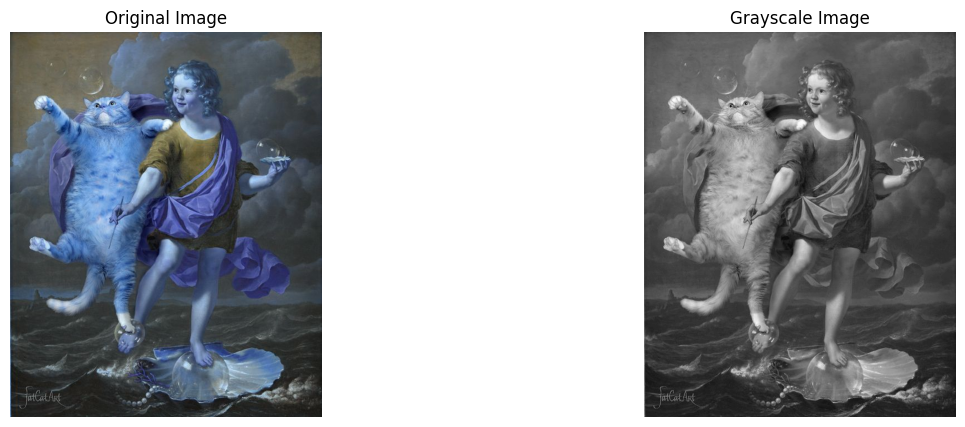

In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# Fungsi untuk menampilkan gambar berdampingan dengan judul
def show_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Upload file gambar
uploaded = files.upload()

# Load gambar
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)  # Membaca gambar yang diunggah
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

# Menampilkan gambar asli
show_images([image, image_gray], ["Original Image", "Grayscale Image"], cmap='gray')


# Moving Average Filter

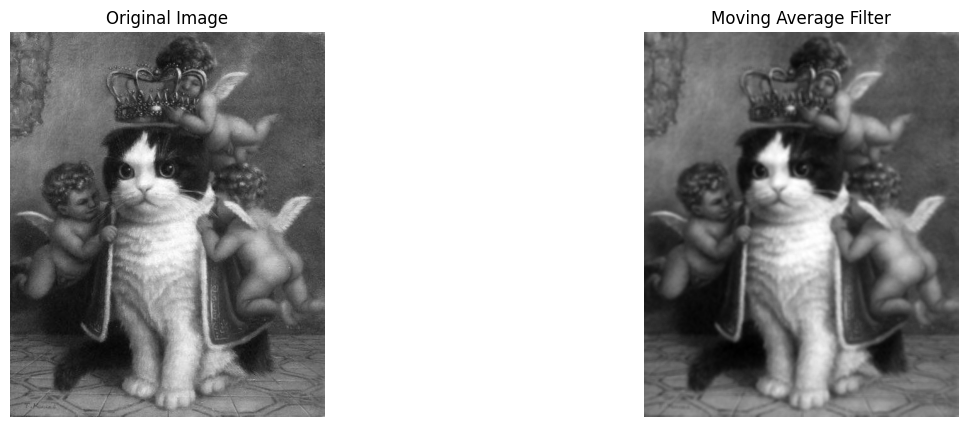

In [ ]:
def moving_average_filter(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

filtered_image = moving_average_filter(image_gray, kernel_size=5)

# Menampilkan hasil
show_images([image_gray, filtered_image], ["Original Image", "Moving Average Filter"], cmap='gray')

Moving Average Filter meratakan intensitas piksel dengan menghitung rata-rata nilai di sekitar jendela kernel, menghasilkan gambar yang lebih halus. Teknik ini efektif untuk mengurangi noise acak namun mengaburkan tepi. Aplikasinya meliputi penghapusan noise pada citra mentah, meskipun kurang cocok untuk gambar yang membutuhkan preservasi detail.



# Feature Detection with SIFT

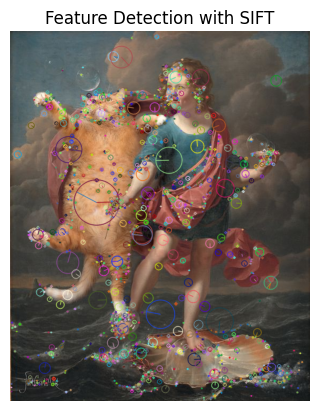

In [ ]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image_gray, None)
image_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Menampilkan hasil
plt.imshow(cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB))
plt.title("Feature Detection with SIFT")
plt.axis('off')
plt.show()

SIFT mendeteksi keypoints pada berbagai skala untuk menangkap fitur penting yang tahan terhadap perubahan skala dan rotasi. Hasilnya menunjukkan titik-titik unik di gambar yang digambarkan dengan lingkaran. Algoritma ini berguna dalam pencocokan gambar, pelacakan objek, dan stitching panorama.



# Representasi Histogram Gambar

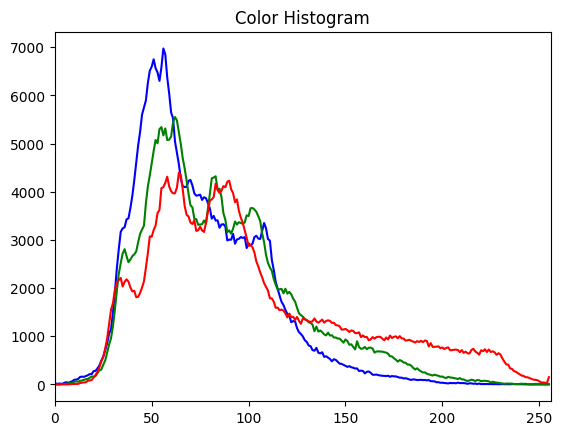

In [ ]:
def plot_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title("Color Histogram")
    plt.show()

plot_histogram(image)

Histogram menggambarkan distribusi intensitas piksel untuk memahami kontras dan kecerahan gambar. Puncak tinggi menunjukkan intensitas dominan. Teknik ini sering digunakan untuk peningkatan kontras dan segmentasi gambar dengan menyesuaikan distribusi intensitas.

# Gaussian Smoothing

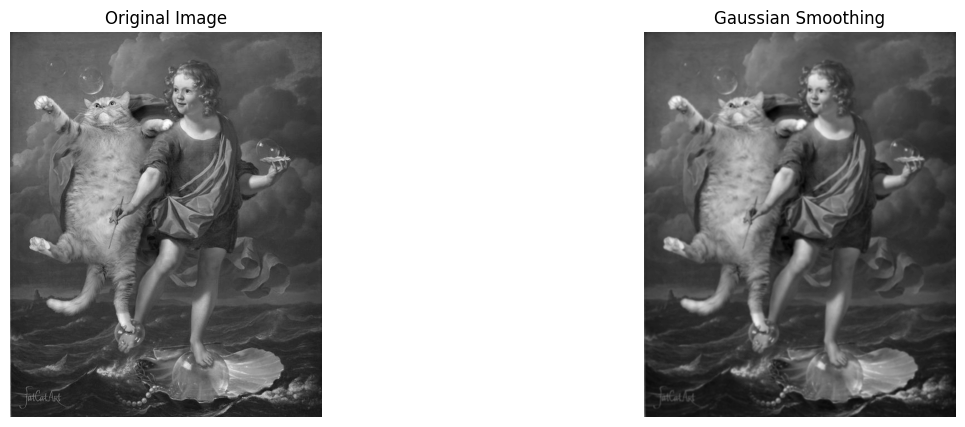

In [ ]:
gaussian_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
show_images([image_gray, gaussian_blur], ["Original Image", "Gaussian Smoothing"], cmap='gray')

Gaussian Smoothing menghaluskan gambar dengan memberi bobot lebih besar pada piksel pusat kernel. Filter ini efektif mengurangi noise sambil mempertahankan struktur utama gambar dibandingkan Moving Average, meskipun tetap mengaburkan detail kecil. Aplikasinya termasuk penghapusan noise Gaussian sebelum analisis lebih lanjut.



# Deteksi Tepi dengan Sobel Filter

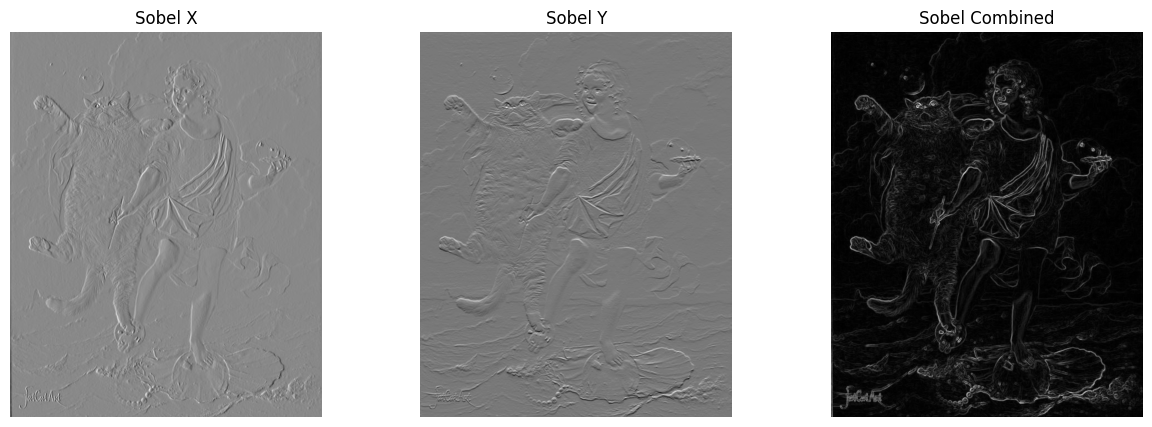

In [ ]:
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
show_images([sobelx, sobely, sobel_combined], ["Sobel X", "Sobel Y", "Sobel Combined"], cmap='gray')

Sobel Filter menghitung perubahan intensitas piksel secara horizontal dan vertikal untuk mendeteksi tepi. Kombinasi gradien menghasilkan peta tepi yang menyoroti batas objek. Filter ini sering digunakan untuk segmentasi gambar dan analisis kontur objek.

# Representasi Fitur dengan HOG

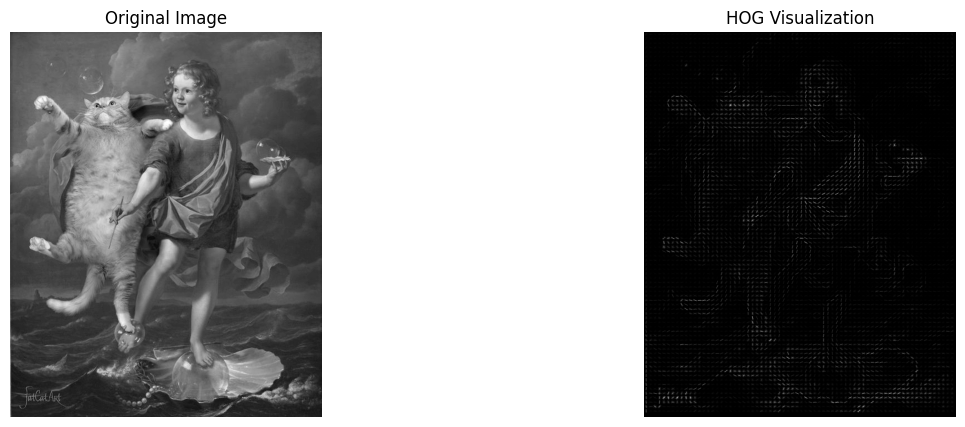

In [ ]:
from skimage.feature import hog
from skimage import color

# Menghitung HOG dan mendapatkan gambar HOG
image_gray_float = image_gray.astype('float') / 255.0  # Konversi ke float
features, hog_image = hog(image_gray_float,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           visualize=True,
                           block_norm='L2-Hys')

# Menampilkan gambar asli dan gambar HOG
show_images([image_gray, hog_image], ["Original Image", "HOG Visualization"], cmap='gray')


HOG membagi gambar menjadi sel kecil dan menghitung histogram gradien untuk mendeskripsikan bentuk lokal. Representasi ini tahan terhadap perubahan kecil pada rotasi, membuatnya efektif untuk deteksi objek berbasis bentuk, seperti deteksi manusia dan pengawasan video.

